In [ ]:
# In termenal

# python -m venv SelectedCS
# .\SelectedCS\Scripts\activate
# pip install numpy
# pip install pandas
# pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121
# pip install matplotlib
# pip install seaborn
# pip install torch
# pip install scikit-learn
# pip install imbalanced-learn
# pip install torchvision
# pip install pillow
# pip install opencv-python
# pip install tensorflow
# pip install keras

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import os, cv2
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import confusion_matrix , classification_report
from keras.utils import to_categorical
from PIL import Image

In [2]:
data = pd.read_csv('Dataset\hmnist_28_28_RGB.csv')
data.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2


In [3]:
y = data['label']
x = data.drop(columns = ['label'])
#get x_train ,y_train
x.shape

(10015, 2352)

In [4]:
# Check the type of x
print(type(x))

# Print the first few values (5 rows) from x
print(x[:5])  # For NumPy array

<class 'pandas.core.frame.DataFrame'>
   pixel0000  pixel0001  pixel0002  pixel0003  pixel0004  pixel0005  \
0        192        153        193        195        155        192   
1         25         14         30         68         48         75   
2        192        138        153        200        145        163   
3         38         19         30         95         59         72   
4        158        113        139        194        144        174   

   pixel0006  pixel0007  pixel0008  pixel0009  ...  pixel2342  pixel2343  \
0        197        154        185        202  ...        134        173   
1        123         93        126        158  ...         82         60   
2        201        142        160        206  ...        149        167   
3        143        103        119        171  ...         73         44   
4        215        162        191        225  ...        201        209   

   pixel2344  pixel2345  pixel2346  pixel2347  pixel2348  pixel2349  \
0      

In [5]:
# Check unique labels in your dataset to confirm the number of classes
print(y.unique())

[2 4 3 6 5 1 0]


In [6]:
other = pd.read_csv('Dataset\HAM10000_metadata.csv')
other.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [7]:
classes = {
           0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),  
           1:('bcc' , ' basal cell carcinoma'), 
           2 :('bkl', 'benign keratosis-like lesions'), 
           3: ('df', 'dermatofibroma'),
           4: ('nv', ' melanocytic nevi'),  
           5: ('vasc', ' pyogenic granulomas and hemorrhage'), 
           6: ('mel', 'melanoma')
           }

Text(0.5, 1.0, 'Frequency Distribution of Classes')

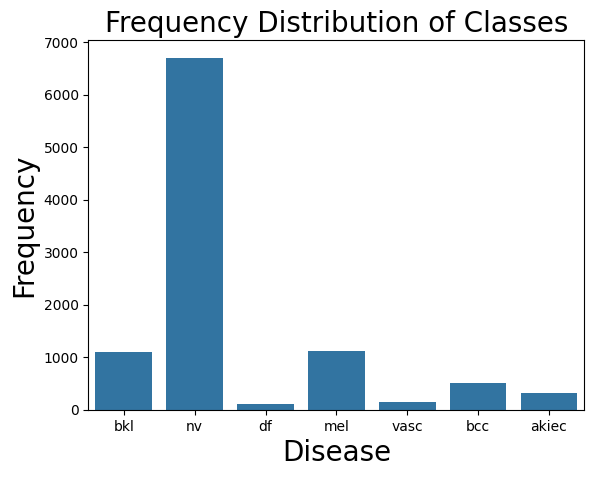

In [8]:
sns.countplot(x = 'dx', data = other)
plt.xlabel('Disease', size=20)
plt.ylabel('Frequency', size=20)
plt.title('Frequency Distribution of Classes', size=20)

In [9]:
k = y.map(classes.get) 
k.value_counts() < 1000, k.value_counts() > 5000,k.value_counts()

(label
 (nv,  melanocytic nevi)                                      False
 (mel, melanoma)                                              False
 (bkl, benign keratosis-like lesions)                         False
 (bcc,  basal cell carcinoma)                                  True
 (akiec, Actinic keratoses and intraepithelial carcinomae)     True
 (vasc,  pyogenic granulomas and hemorrhage)                   True
 (df, dermatofibroma)                                          True
 Name: count, dtype: bool,
 label
 (nv,  melanocytic nevi)                                       True
 (mel, melanoma)                                              False
 (bkl, benign keratosis-like lesions)                         False
 (bcc,  basal cell carcinoma)                                 False
 (akiec, Actinic keratoses and intraepithelial carcinomae)    False
 (vasc,  pyogenic granulomas and hemorrhage)                  False
 (df, dermatofibroma)                                         False
 Name: 

Text(0.5, 1.0, 'Gender of Patient')

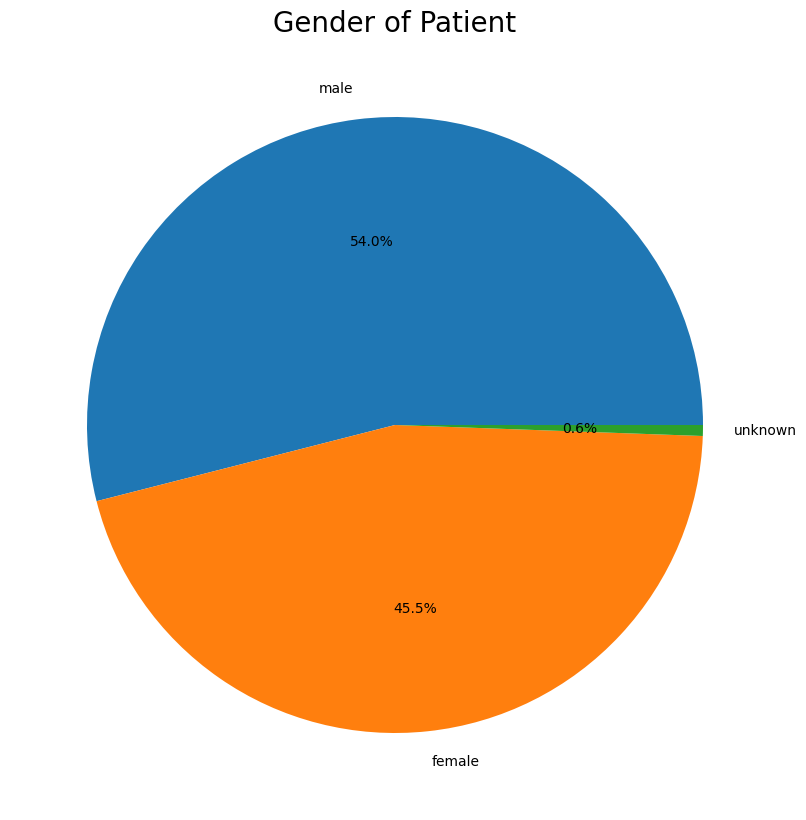

In [10]:
bar, ax = plt.subplots(figsize = (10,10))
plt.pie(other['sex'].value_counts(), 
        labels = other['sex'].value_counts().index, 
        autopct="%.1f%%")
plt.title('Gender of Patient', size=20)

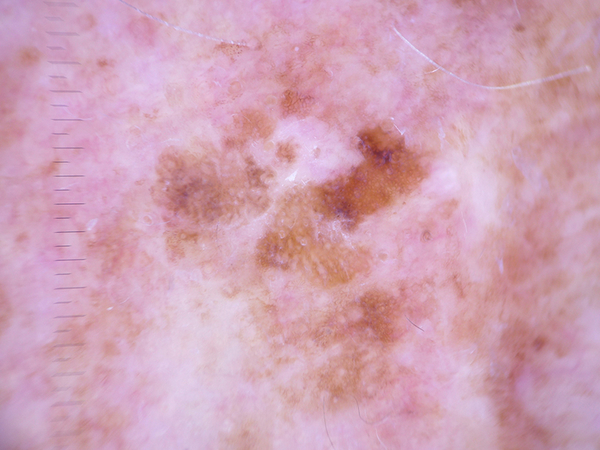

In [11]:
Image.open('Dataset\HAM10000_images_part_1\ISIC_0027419.jpg')

Text(0.5, 1.0, 'Histogram of Age of Patients')

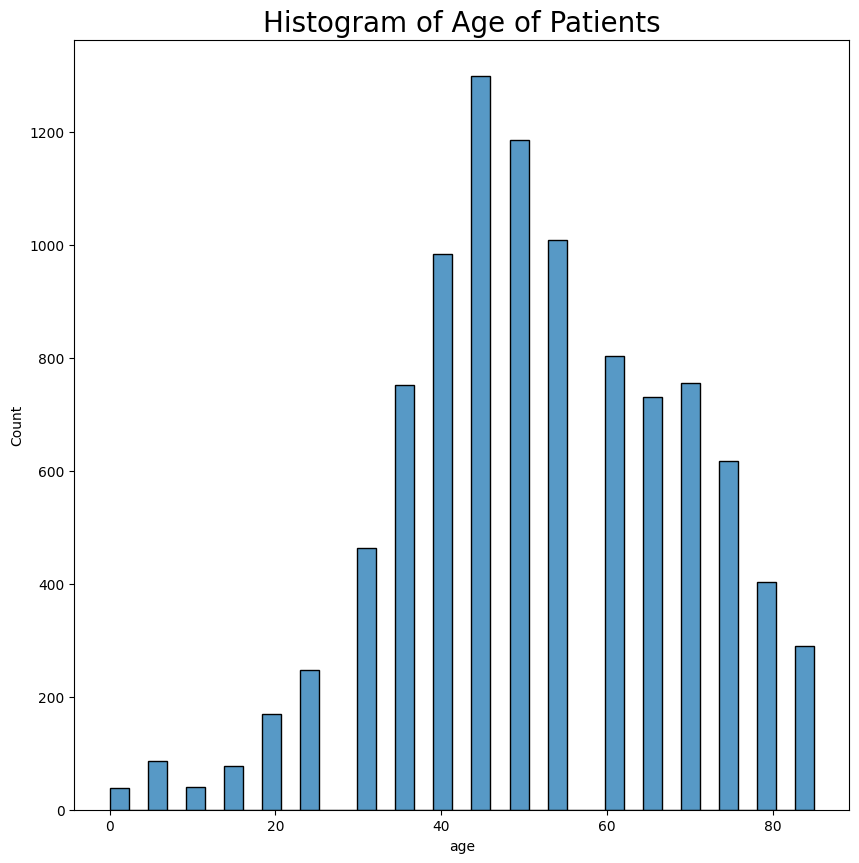

In [12]:
bar, ax = plt.subplots(figsize=(10,10))
sns.histplot(other['age'])
plt.title('Histogram of Age of Patients', size=20)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'back'),
  Text(1, 0, 'lower extremity'),
  Text(2, 0, 'trunk'),
  Text(3, 0, 'upper extremity'),
  Text(4, 0, 'abdomen'),
  Text(5, 0, 'face'),
  Text(6, 0, 'chest'),
  Text(7, 0, 'foot'),
  Text(8, 0, 'scalp'),
  Text(9, 0, 'neck'),
  Text(10, 0, 'unknown'),
  Text(11, 0, 'hand'),
  Text(12, 0, 'genital'),
  Text(13, 0, 'ear'),
  Text(14, 0, 'acral')])

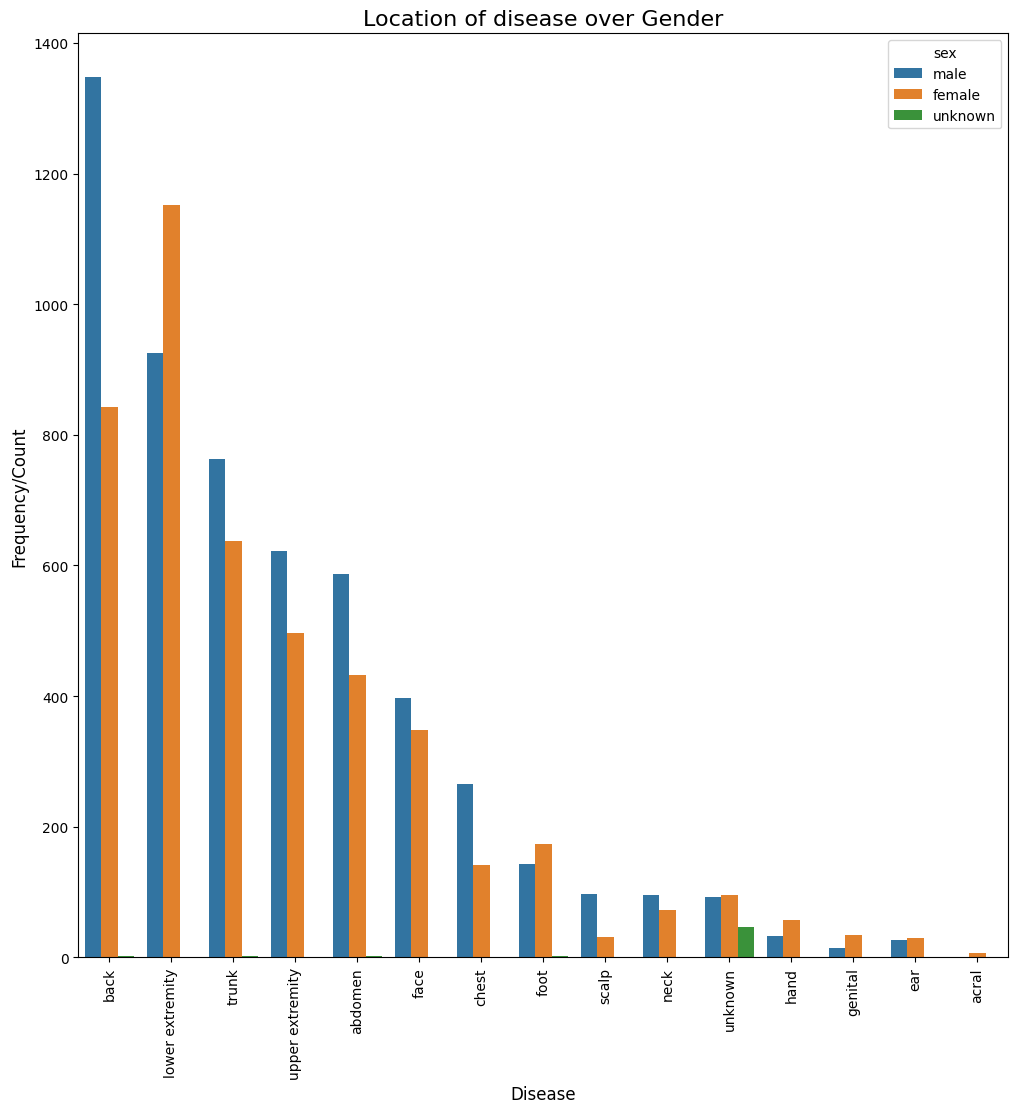

In [13]:
value = other[['localization', 'sex']].value_counts().to_frame()
value.reset_index(level=[1,0 ], inplace=True)
temp = value.rename(columns = {'localization':'location', 0: 'count'})

bar, ax = plt.subplots(figsize = (12, 12))
sns.barplot(x = 'location',  y='count', hue = 'sex', data = temp)
plt.title('Location of disease over Gender', size = 16)
plt.xlabel('Disease', size=12)
plt.ylabel('Frequency/Count', size=12)
plt.xticks(rotation = 90)

In [14]:
oversample = RandomOverSampler()
x,y  = oversample.fit_resample(x,y)
x = np.array(x).reshape(-1,28,28,3)
print('Shape of Data :',x.shape)

Shape of Data : (46935, 28, 28, 3)


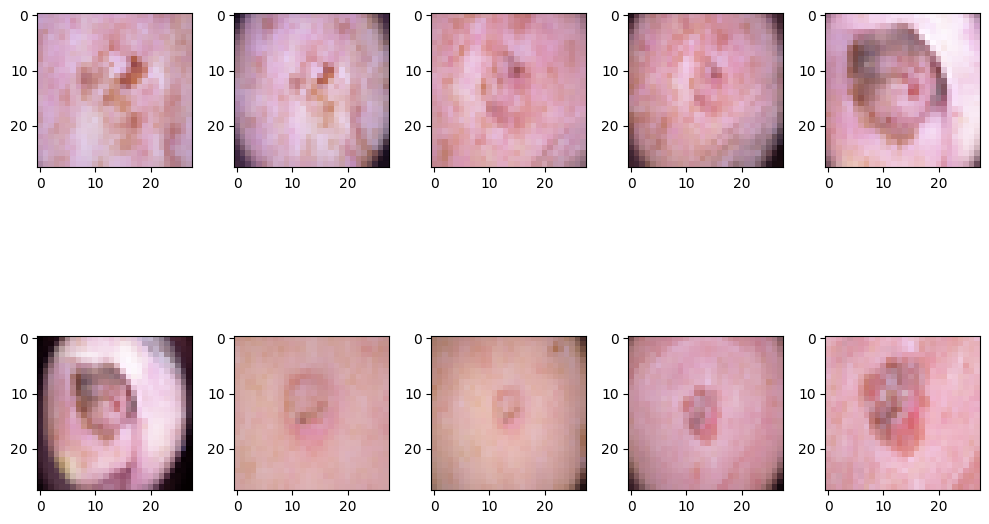

In [15]:
f , ax = plt.subplots(2,5)
f.set_size_inches(10, 10)
k = 0 
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(x[k].reshape(28,28,3))
        k = k + 1
    plt.tight_layout()

In [16]:
x = (x-np.mean(x))/np.std(x)

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2, random_state=42)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.819747447774042..0.9452281680016048].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.457730561641768..0.2694633138880272].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.7956129886985566..0.8486903316996651].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-3.6403190563405285..1.3313795132093633].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.6854278712262507..1.403782890435818].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-3.0852264976043755..1.7899342356435768].
Clipping input data to th

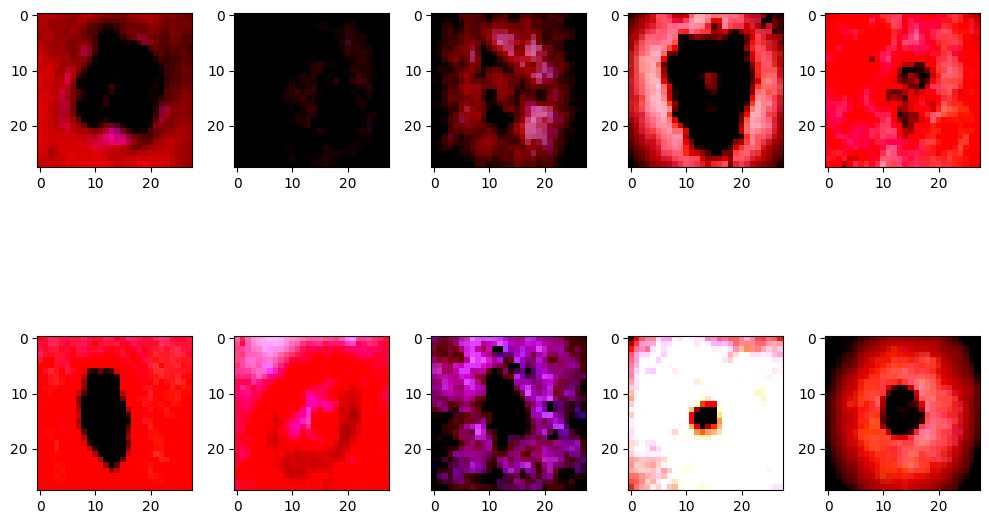

In [18]:
f , ax = plt.subplots(2,5)
f.set_size_inches(10, 10)
k = 0 
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(X_train[k].reshape(28,28,3))
        k = k + 1
    plt.tight_layout()

# **#CNN**

In [63]:
import pandas as pd
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image

In [180]:
class SkinCancerDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.dataframe = dataframe
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        # Get pixel values and label
        pixels = self.dataframe.iloc[idx, :-1].values  # all pixel columns
        label = self.dataframe.iloc[idx, -1]           # the label column

        # Convert pixels to tensor
        image = torch.tensor(pixels, dtype=torch.float32)

        # Reshape (channels, height, width) = (3, 28, 28)
        image = image.view(3, 28, 28)

        # Normalize if needed (optional, recommended)
        image = image / 255.0

        # Apply any transform (e.g., RandomFlip etc.)
        if self.transform:
            image = self.transform(image)

        return image, label

In [187]:
import torchvision.transforms as transforms

train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
    transforms.ColorJitter(brightness=0.1, contrast=0.1),
    transforms.ToTensor()
])

val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

In [188]:
from torch.utils.data import random_split

# Create the dataset
dataset = SkinCancerDataset(dataframe=data)

# Split dataset into training, validation, and test sets
train_size = int(0.8 * len(dataset))  # 80% for training
val_size = int(0.1 * len(dataset))    # 10% for validation
test_size = len(dataset) - train_size - val_size  # The remaining 10% for testing

train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

# Create DataLoaders for each dataset
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [197]:
class SkinCancerCNN(nn.Module):
    def __init__(self):
        super(SkinCancerCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, 3, padding=1),  # Conv1
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(32, 64, 3, padding=1),  # Conv2
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(64, 128, 3, padding=1),  # Conv3
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.classifier = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(128 * 3 * 3, 512),   # ✅ correct
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, 7)
)


    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

In [199]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [200]:
import torch
import time
import joblib
from sklearn.metrics import accuracy_score
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.optim.lr_scheduler import StepLR

In [201]:
from sklearn.utils.class_weight import compute_class_weight

all_labels = []
for i in range(len(dataset)):
    _, label = dataset[i]
    all_labels.append(label.item() if isinstance(label, torch.Tensor) else label)

all_labels = np.array(all_labels)
all_labels = all_labels.astype(int)  # Fix type to int

# 🧠 Compute class weights
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', classes=np.unique(all_labels), y=all_labels)
class_weights = torch.tensor(class_weights, dtype=torch.float32).to(device)

# 🧠 Now create your loss
criterion = nn.CrossEntropyLoss(weight=class_weights)

In [202]:
# Initialize the model, optimizer, and loss function
model = SkinCancerCNN().to(device)  # Assuming you already have the model definition
optimizer = optim.Adam(model.parameters(), lr=1e-5)

In [203]:
# Learning Rate Scheduler
from torch.optim.lr_scheduler import StepLR

# Learning rate scheduler that reduces the learning rate by 0.1 every 5 epochs
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=5, factor=0.5)

In [204]:
def evaluate_model(data_loader):
    model.eval()  # Set model to evaluation mode
    total_loss = 0
    correct_predictions = 0
    total_samples = 0
    
    with torch.no_grad():  # Disable gradient calculations during evaluation
        for images, labels in train_loader:
            images = images.to(device)
            labels = labels.to(device)

            if labels.ndim > 1:  # If labels are one-hot, fix them
                labels = labels.argmax(dim=1)

            outputs = model(images)
            loss = criterion(outputs, labels)
            
            total_loss += loss.item()
            _, preds = torch.max(outputs, 1)  # Get predicted class
            correct_predictions += torch.sum(preds == labels)
            total_samples += labels.size(0)
    
    avg_loss = total_loss / len(data_loader)
    accuracy = correct_predictions.double() / total_samples
    return avg_loss, accuracy

In [207]:
# Define the number of epochs
num_epochs = 100

# Initialize lists to store loss and accuracy for plotting
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []
test_losses = []
test_accuracies = []
best_val_loss = float('inf')

# Training loop (as before)
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    patience_limit = 10   # Example: wait 10 epochs without improvement
    patience_counter = 0  # Start with 0

    # Training phase
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # Calculate training loss and accuracy
    train_loss = running_loss / len(train_loader)
    train_accuracy = correct / total

    # Validation phase
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():  # No gradients required for validation
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    val_loss = val_loss / len(val_loader)
    val_accuracy = val_correct / val_total
    test_loss, test_acc = evaluate_model(test_loader)

    # Store results for plotting
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)
    test_losses.append(test_loss)
    test_accuracies.append(test_acc)

    # Print the epoch results
    print(f'Epoch {epoch+1}/{num_epochs}, '
          f'Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, '
          f'Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}, '
          f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0
    else:
        patience_counter += 1

    if patience_counter >= patience_limit:
        print("Early stopping triggered!")
        break

    scheduler.step(val_loss)

# Save the trained model
torch.save(model.state_dict(), 'cnn_model.pth')
print("CNN model saved successfully as 'cnn_model.pth'!")

Epoch 1/100, Train Loss: 1.7782, Train Accuracy: 0.4141, Val Loss: 1.7189, Val Accuracy: 0.5095, Test Loss: 13.2334, Test Accuracy: 0.5282
Epoch 2/100, Train Loss: 1.7624, Train Accuracy: 0.4383, Val Loss: 1.6825, Val Accuracy: 0.4935, Test Loss: 12.9610, Test Accuracy: 0.5226
Epoch 3/100, Train Loss: 1.7216, Train Accuracy: 0.4500, Val Loss: 1.6573, Val Accuracy: 0.5135, Test Loss: 12.7661, Test Accuracy: 0.5348
Epoch 4/100, Train Loss: 1.7072, Train Accuracy: 0.4725, Val Loss: 1.6349, Val Accuracy: 0.5085, Test Loss: 12.6159, Test Accuracy: 0.5213
Epoch 5/100, Train Loss: 1.6803, Train Accuracy: 0.4828, Val Loss: 1.6200, Val Accuracy: 0.5135, Test Loss: 12.4037, Test Accuracy: 0.5316
Epoch 6/100, Train Loss: 1.6590, Train Accuracy: 0.4893, Val Loss: 1.6131, Val Accuracy: 0.5135, Test Loss: 12.3194, Test Accuracy: 0.5290
Epoch 7/100, Train Loss: 1.6630, Train Accuracy: 0.4923, Val Loss: 1.5914, Val Accuracy: 0.5015, Test Loss: 12.1730, Test Accuracy: 0.5176
Epoch 8/100, Train Loss: 1.

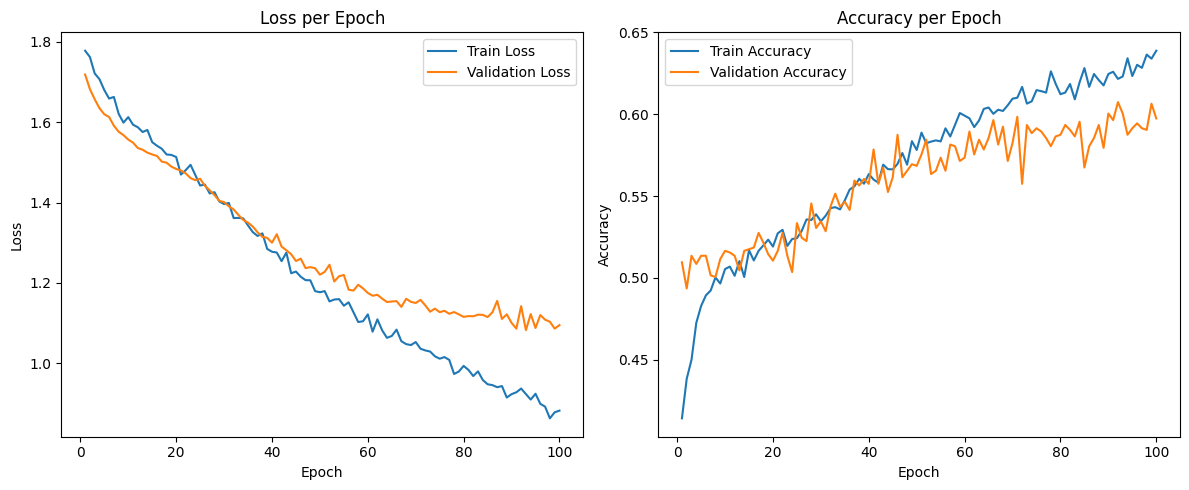

In [208]:
import matplotlib.pyplot as plt

# Plot Loss curve
plt.figure(figsize=(12, 5))

# Plot Training and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss per Epoch')
plt.legend()

# Plot Training and Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, len(val_accuracies) + 1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy per Epoch')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [60]:
import torch
import numpy as np
import joblib
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ Load the saved PyTorch model
model = SimpleCNN().to(device)  # Assuming the model is SimpleCNN
model.load_state_dict(torch.load('cnn_model.pth'))
model.eval()  # Set the model to evaluation mode
print("Model successfully loaded!")

Model successfully loaded!


C:\Users\Admin\AppData\Local\Temp\ipykernel_23208\464322350.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('cnn_model.pth'))


In [ ]:
# ✅ Make predictions on the test data
# Assuming X_test is already loaded and preprocessed as a tensor
X_test_tensor = torch.tensor(X_test).to(device)  # Convert X_test to a tensor and move it to the device
with torch.no_grad():  # No gradients needed during inference
    y_pred_prob = model(X_test_tensor)  # Get raw model outputs (logits)
    y_pred = torch.argmax(y_pred_prob, dim=1).cpu().numpy()  # Get the predicted class labels

# ✅ Evaluate accuracy
# Assuming Y_test is also loaded and preprocessed as a tensor
Y_test_tensor = torch.tensor(Y_test).to(device)  # Convert Y_test to a tensor and move it to the device
correct = (y_pred == Y_test_tensor.cpu().numpy()).sum().item()  # Count correct predictions
accuracy = correct / len(Y_test)  # Calculate accuracy

# Print loss and accuracy (PyTorch does not use evaluate like TensorFlow)
print(f"Accuracy: {accuracy * 100:.2f}%")

In [ ]:
# ✅ Classification report
print("\nClassification Report:")
print(classification_report(Y_test, y_pred))

# ✅ Confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(7), yticklabels=range(7))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
import torch
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import transforms

# ✅ Load the model (the architecture and weights)
model = SimpleCNN().to(device)  # Assuming your model is SimpleCNN
model.load_state_dict(torch.load('cnn_model.pth'))
model.eval()  # Set model to evaluation mode
print("Model successfully loaded!")

# ✅ Function to predict image
def predict_image(image_path, model):
    # Load and preprocess the image
    img = Image.open(image_path)
    img = img.resize((28, 28))  # Adjust according to model's input size

    # Define the image transformations (resize, convert to tensor, normalize)
    transform = transforms.Compose([
        transforms.ToTensor(),  # Convert image to tensor
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
    ])

    # Apply the transformations to the image
    img_tensor = transform(img).unsqueeze(0).to(device)  # Add batch dimension and move to device

    # Predict the class
    with torch.no_grad():  # No gradients needed for inference
        outputs = model(img_tensor)
        predicted_class = torch.argmax(outputs, dim=1).item()

    # Display the image and predicted class
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Predicted Class: {predicted_class}")
    plt.show()

    return predicted_class

Model berhasil dimuat!


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


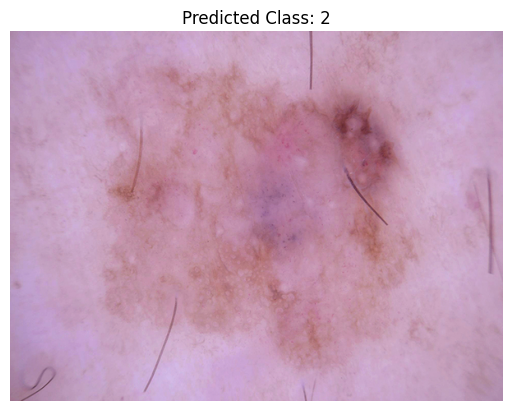

Gambar diklasifikasikan sebagai kelas: 2


In [ ]:
# ✅ Contoh penggunaan fungsi
image_path = "Dataset\HAM10000_images_part_1\ISIC_0024312.jpg"  # Ganti dengan path gambar yang ingin diprediksi
predicted_class = predict_image(image_path, model)
print(f"Image classified as class: {predicted_class}")